In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error



import warnings
warnings.filterwarnings(action = "ignore")

In [79]:
df = pd.read_csv('../Data/uber.csv')

In [80]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [81]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [82]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [83]:
df.shape

(200000, 8)

This dataset contain 200,000 rows and 8 columns.

In [84]:
all_col = list(df.columns)

print(f"All features : {all_col}")

All features : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


1. key - a unique identifier for each trip
2. fare_amount - the cost of each trip in usd
3. pickup_datetime - date and time when the meter was engaged
4. passenger_count - the number of passengers in the vehicle (driver entered value)
5. pickup_longitude - the longitude where the meter was engaged
6. pickup_latitude - the latitude where the meter was engaged
7. dropoff_longitude - the longitude where the meter was disengaged
8. dropoff_latitude - the latitude where the meter was disengaged

# Dealing with duplicate values.

In [85]:
df.duplicated().sum()

0

There are no duplicated values in that dataset.

# Dealing with missing values.

In [86]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [87]:
df[df.isnull().any(axis = 1)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [88]:
df.dropna(inplace = True)

In [89]:
df.shape

(199999, 8)

Now it contain 199,999 rows and 8 columns.

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000


Longitude:
1. Minimum: -180 degrees (180 degrees West)
2. Maximum: +180 degrees (180 degrees East)

Latitude:
1. Minimum: -90 degrees (South Pole)
2. Maximum: +90 degrees (North Pole)

passenger_count:

The maximum number of passengers allowed in an Uber vehicle can vary depending on the type of Uber service and the vehicle being used. In most standard Uber services but the maximum number of passengers is typically 6.


# Dealing with unnecessary values.

In [91]:
df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) | (df['dropoff_longitude'] > 180) | (df['dropoff_longitude'] < -180) | (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) | (df['dropoff_latitude'] > 90) | (df['dropoff_latitude'] < -90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4949,2012-04-28 00:58:00.000000235,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957,-74.003570,40.734192,1
32549,2012-06-16 10:04:00.00000061,15.7,2012-06-16 10:04:00 UTC,-74.016055,40.715155,-737.916665,40.697862,2
48506,2011-11-05 23:26:00.000000309,33.7,2011-11-05 23:26:00 UTC,-735.200000,40.770092,-73.980187,40.765530,1
56617,2012-03-11 07:24:00.00000031,8.1,2012-03-11 07:24:00 UTC,-73.960828,404.433332,-73.988357,40.769037,1
61793,2012-06-13 05:45:00.0000006,8.5,2012-06-13 05:45:00 UTC,-73.951385,401.066667,-73.982110,40.754117,1
75851,2011-11-05 00:22:00.00000051,15.7,2011-11-05 00:22:00 UTC,-1340.648410,1644.421482,-3356.666300,872.697628,1
91422,2011-05-18 13:24:00.000000213,16.1,2011-05-18 13:24:00 UTC,57.418457,1292.016128,1153.572603,-881.985513,1
103745,2011-10-14 19:04:00.000000202,12.9,2011-10-14 19:04:00 UTC,-736.216667,40.767035,-73.982377,40.725562,1
139447,2012-01-20 11:50:00.00000088,13.7,2012-01-20 11:50:00 UTC,-74.011042,40.709780,-73.983163,493.533332,4
144253,2009-08-26 11:55:00.00000023,7.3,2009-08-26 11:55:00 UTC,-768.550000,40.757812,-73.997040,40.740007,1


In [92]:
drop_index = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) | (df['dropoff_longitude'] > 180) | (df['dropoff_longitude'] < -180) | (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) | (df['dropoff_latitude'] > 90) | (df['dropoff_latitude'] < -90)].index

drop_index

Int64Index([  4949,  32549,  48506,  56617,  61793,  75851,  91422, 103745,
            139447, 144253, 161652, 199936],
           dtype='int64')

In [93]:
df.drop(index = drop_index, axis = 0, inplace = True)

In [94]:
df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) | (df['dropoff_longitude'] > 180) | (df['dropoff_longitude'] < -180) | (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) | (df['dropoff_latitude'] > 90) | (df['dropoff_latitude'] < -90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [95]:
def calculate_distance(long1, lati1, long2, lati2):
    distance = []
    
    for i in range (len(list(pickup_longitude))):
        
        lon1,lat1,lon2,lat2 = map(mt.radians, [long1[i], lati1[i], long2[i], lati2[i]])
        
        x = abs(lat1 - lat2)
        y = abs(lon1 - lon2)
    
        a = (mt.sin(x/2) ** 2) + mt.cos(lat1) * mt.cos(lat2) * (mt.sin(y/2) ** 2)
        c = 2 * mt.atan2(np.sqrt(a), np.sqrt(1-a))
        distance.append(6371 * c)
    
    return distance

In [96]:
pickup_longitude = np.asarray(df['pickup_longitude'])
pickup_latitude	 = np.asarray(df['pickup_latitude'])
dropoff_longitude = np.asarray(df['dropoff_longitude'])
dropoff_latitude = np.asarray(df['dropoff_latitude'])

In [97]:
df['Distance (km)'] = calculate_distance(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)

In [98]:
df.drop(columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1, inplace = True)

In [99]:
df.shape

(199987, 5)

Now it has 199,987 rows and 5 columns. 

The maximum number of passengers allowed in an Uber vehicle can vary depending on the type of Uber service and the vehicle being used. In most standard Uber services but the maximum number of passengers is typically 6.

In [100]:
df[df['passenger_count'] > 6]

,key,fare_amount,pickup_datetime,passenger_count,Distance (km)
113038,2010-12-28 08:20:00.0000001,11.7,2010-12-28 08:20:00 UTC,208,0.009825


In [101]:
drop_index = df[df['passenger_count'] > 6].index

print(drop_index)

Int64Index([113038], dtype='int64')


In [102]:
df.drop(index = drop_index, axis = 0, inplace = True)

In [103]:
df[df['passenger_count'] > 6]

,key,fare_amount,pickup_datetime,passenger_count,Distance (km)


In [104]:
df[~((df['Distance (km)'] == 0 ) & (df['fare_amount'] == 0)) & ((df['fare_amount'] == 0))]

,key,fare_amount,pickup_datetime,passenger_count,Distance (km)
22182,2010-03-20 02:59:51.0000002,0.0,2010-03-20 02:59:51 UTC,2,11.065289
87467,2015-01-04 03:51:13.0000002,0.0,2015-01-04 03:51:13 UTC,2,8665.983754
156738,2015-02-17 08:48:08.0000005,0.0,2015-02-17 08:48:08 UTC,1,0.000643


If 	Distance (km) > 0 , fare_amount can not be 0.

In [105]:
drop_index = df[~((df['Distance (km)'] == 0 ) & (df['fare_amount'] == 0)) & ((df['fare_amount'] == 0))].index

print(drop_index)

Int64Index([22182, 87467, 156738], dtype='int64')


In [106]:
df.drop(index = drop_index, axis = 0, inplace = True)

In [107]:
df[~((df['Distance (km)'] == 0 ) & (df['fare_amount'] == 0)) & ((df['fare_amount'] == 0))]

,key,fare_amount,pickup_datetime,passenger_count,Distance (km)


If Distance (km) = 0 , fare_amount can not be greater than 0.

In [108]:
df1 = df[~((df['Distance (km)'] == 0 ) & (df['fare_amount'] == 0)) & ((df['Distance (km)'] == 0 ) & (df['fare_amount'] >= 0))]
df1

,key,fare_amount,pickup_datetime,passenger_count,Distance (km)
5,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,1,0.0
7,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,1,0.0
11,2011-05-23 22:15:00.00000086,8.5,2011-05-23 22:15:00 UTC,1,0.0
48,2013-01-03 22:24:41.0000002,56.8,2013-01-03 22:24:41 UTC,1,0.0
65,2014-05-05 19:27:00.00000034,6.0,2014-05-05 19:27:00 UTC,1,0.0
...,...,...,...,...,...
199880,2014-02-22 06:45:46.0000002,6.5,2014-02-22 06:45:46 UTC,1,0.0
199883,2012-09-10 17:39:00.00000090,12.5,2012-09-10 17:39:00 UTC,2,0.0
199917,2013-06-24 22:17:43.0000002,4.5,2013-06-24 22:17:43 UTC,1,0.0
199932,2011-03-22 13:59:00.00000018,24.9,2011-03-22 13:59:00 UTC,5,0.0


In [109]:
to_drop = df[~((df['Distance (km)'] == 0 ) & (df['fare_amount'] == 0)) & ((df['Distance (km)'] == 0 ) & (df['fare_amount'] >= 0))].index

In [110]:
df.drop(index = to_drop, axis = 0, inplace = True)

In [111]:
df[~((df['Distance (km)'] == 0 ) & (df['fare_amount'] == 0)) & ((df['Distance (km)'] == 0 ) & (df['fare_amount'] >= 0))]

,key,fare_amount,pickup_datetime,passenger_count,Distance (km)


In [112]:
df['pickup_date'] = df['pickup_datetime'].str.split(' ', expand = True)[0]
df['pickup_time'] = df['pickup_datetime'].str.split(' ', expand = True)[1]

In [113]:
df.head()

,key,fare_amount,pickup_datetime,passenger_count,Distance (km),pickup_date,pickup_time
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,1,1.683323,2015-05-07,19:52:06
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,1,2.457590,2009-07-17,20:04:56
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,1,5.036377,2009-08-24,21:45:00
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,3,1.661683,2009-06-26,08:22:21
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,5,4.475450,2014-08-28,17:47:00


In [114]:
df['pickup_month'] = df['pickup_date'].str.split('-', expand = True)[1]
df['pickup_day'] = df['pickup_date'].str.split('-', expand = True)[2]
df.head()

,key,fare_amount,pickup_datetime,passenger_count,Distance (km),pickup_date,pickup_time,pickup_month,pickup_day
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,1,1.683323,2015-05-07,19:52:06,05,07
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,1,2.457590,2009-07-17,20:04:56,07,17
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,1,5.036377,2009-08-24,21:45:00,08,24
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,3,1.661683,2009-06-26,08:22:21,06,26
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,5,4.475450,2014-08-28,17:47:00,08,28


In [115]:
df['pickup_hour'] = df['pickup_time'].str.split(':', expand = True)[0]
df['pickup_minute'] = df['pickup_time'].str.split(':', expand = True)[1]
df.head()

,key,fare_amount,pickup_datetime,passenger_count,Distance (km),pickup_date,pickup_time,pickup_month,pickup_day,pickup_hour,pickup_minute
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,1,1.683323,2015-05-07,19:52:06,05,07,19,52
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,1,2.457590,2009-07-17,20:04:56,07,17,20,04
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,1,5.036377,2009-08-24,21:45:00,08,24,21,45
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,3,1.661683,2009-06-26,08:22:21,06,26,08,22
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,5,4.475450,2014-08-28,17:47:00,08,28,17,47


In [116]:
df.drop(columns = ['key', 'pickup_datetime', 'pickup_date', 'pickup_time'], axis = 1, inplace = True)
df.head(6)

,fare_amount,passenger_count,Distance (km),pickup_month,pickup_day,pickup_hour,pickup_minute
0,7.5,1,1.683323,05,07,19,52
1,7.7,1,2.457590,07,17,20,04
2,12.9,1,5.036377,08,24,21,45
3,5.3,3,1.661683,06,26,08,22
4,16.0,5,4.475450,08,28,17,47
6,24.5,5,11.731015,10,12,07,04


In [117]:
df.dtypes

fare_amount        float64
passenger_count      int64
Distance (km)      float64
pickup_month        object
pickup_day          object
pickup_hour         object
pickup_minute       object
dtype: object

In [118]:
df['pickup_month'] = df['pickup_month'].astype('int64')
df['pickup_day'] = df['pickup_day'].astype('int64')
df['pickup_hour'] = df['pickup_hour'].astype('int64')
df['pickup_minute'] = df['pickup_minute'].astype('int64')

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,194353.0,11.353372,9.753446,-52.0,6.000000,8.500000,12.500000,499.000000
passenger_count,194353.0,1.683838,1.307185,0.0,1.000000,1.000000,2.000000,6.000000
Distance (km),194353.0,21.111697,384.567785,0.0,1.281695,2.184262,3.959393,8782.898606
pickup_month,194353.0,6.280989,3.440355,1.0,3.000000,6.000000,9.000000,12.000000
pickup_day,194353.0,15.703864,8.687694,1.0,8.000000,16.000000,23.000000,31.000000
pickup_hour,194353.0,13.488467,6.515229,0.0,9.000000,14.000000,19.000000,23.000000
pickup_minute,194353.0,29.527710,17.339182,0.0,14.000000,30.000000,45.000000,59.000000


In [120]:
df.dtypes

fare_amount        float64
passenger_count      int64
Distance (km)      float64
pickup_month         int64
pickup_day           int64
pickup_hour          int64
pickup_minute        int64
dtype: object

In [121]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All Features : {all_col}")
print(f"\nNumeric Features : {num_col}")
print(f"\nCategorical Features : {cat_col}")

All Features : ['fare_amount', 'passenger_count', 'Distance (km)', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute']

Numeric Features : ['fare_amount', 'passenger_count', 'Distance (km)', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute']

Categorical Features : []


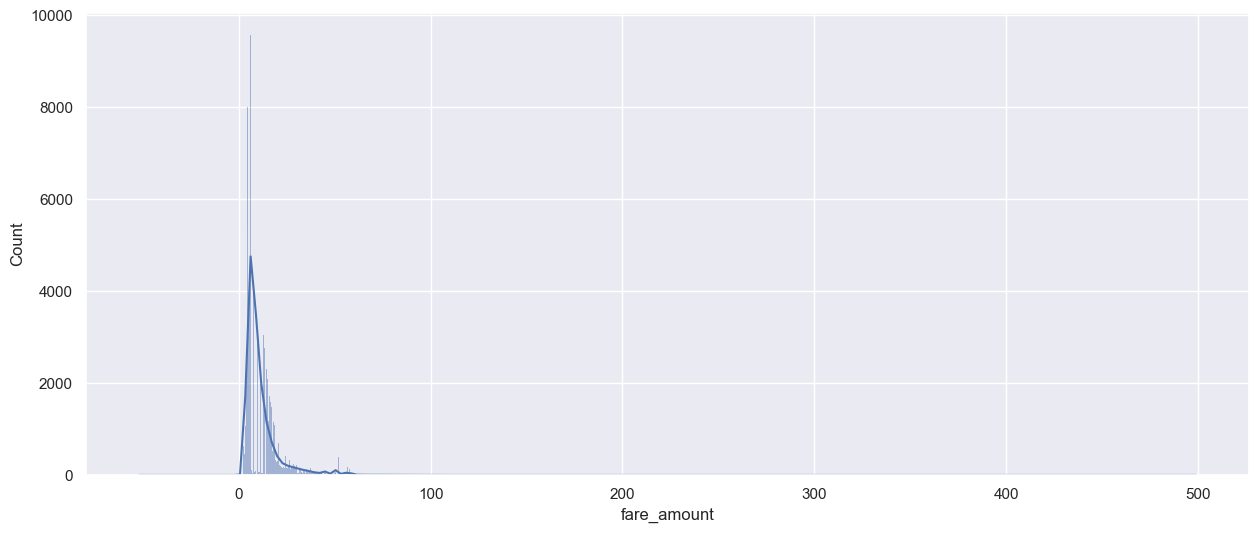

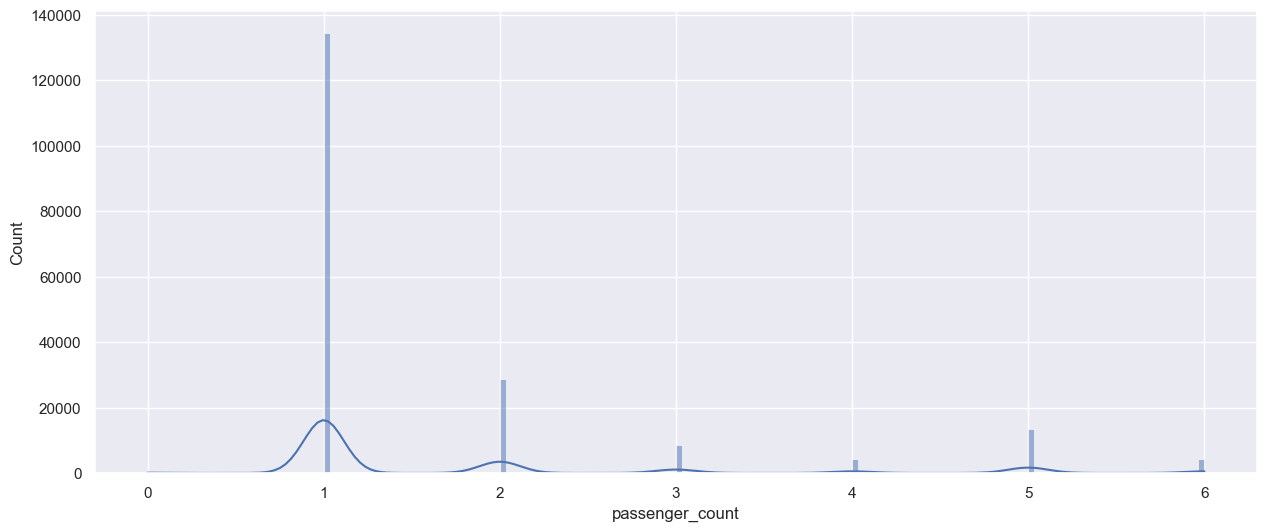

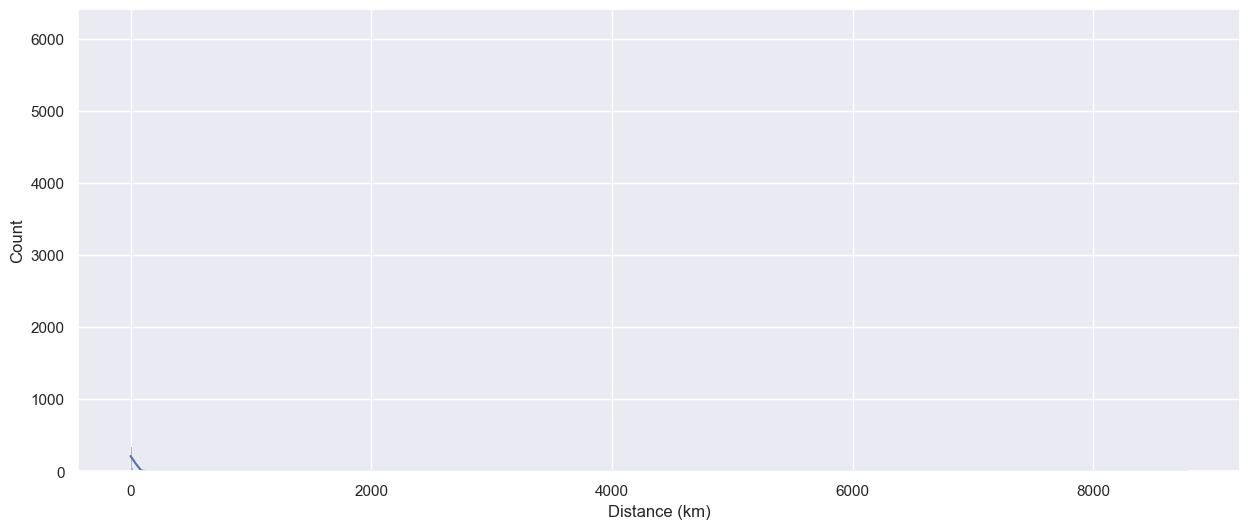

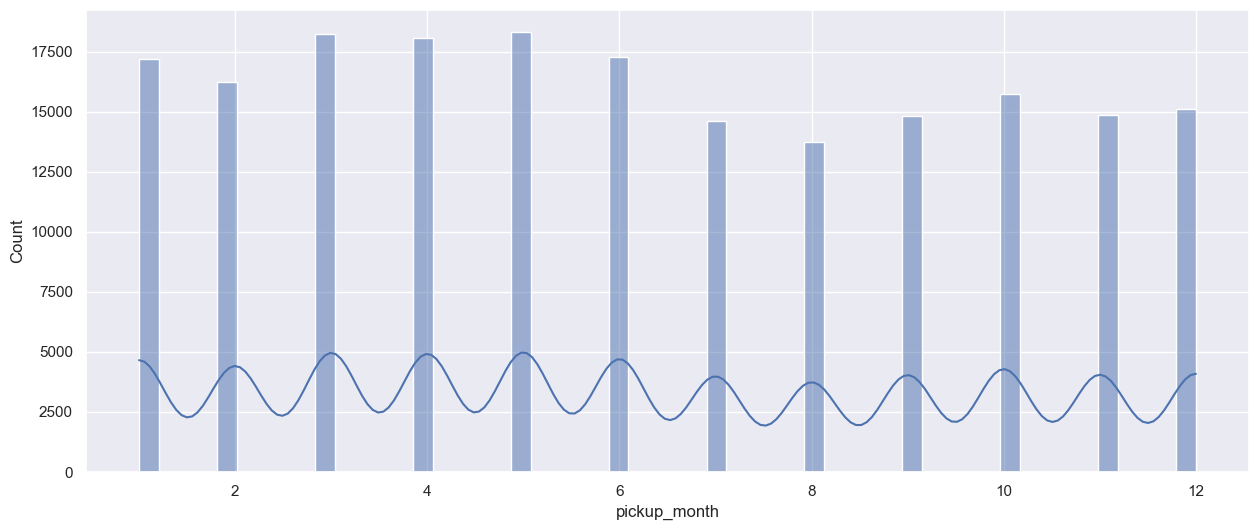

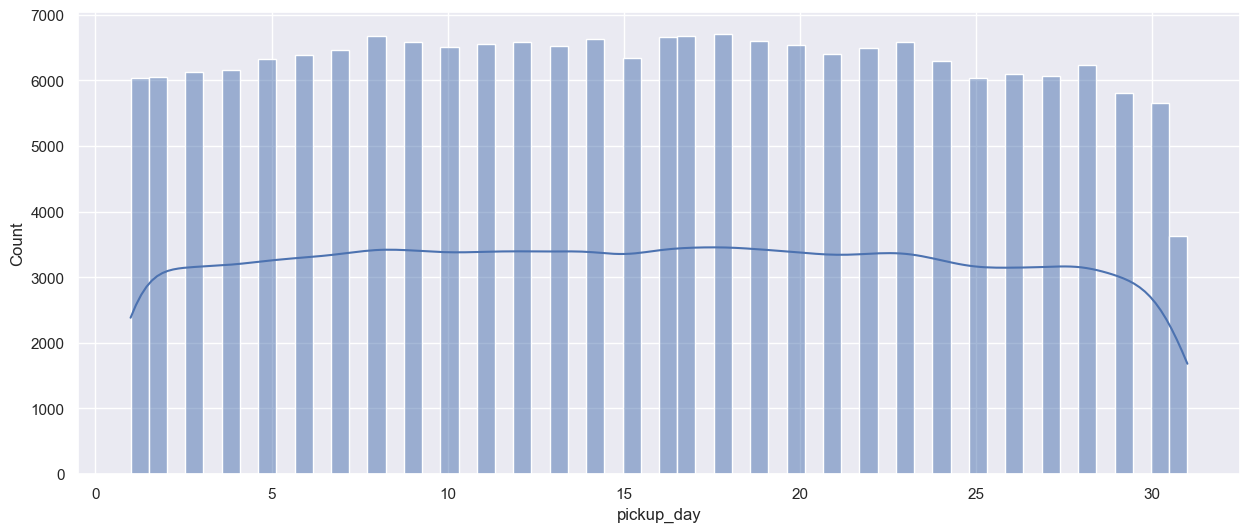

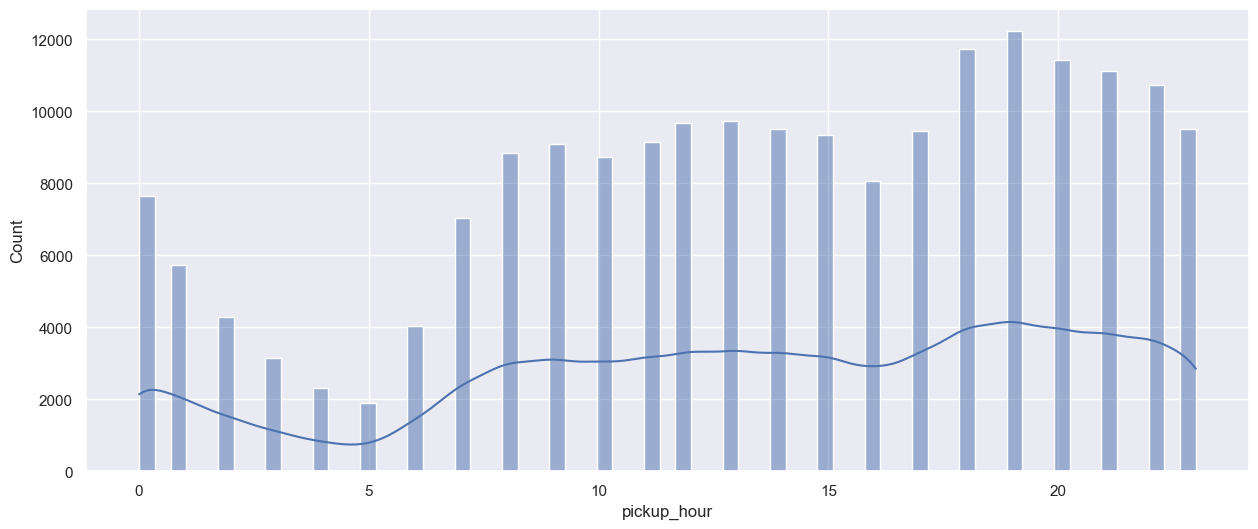

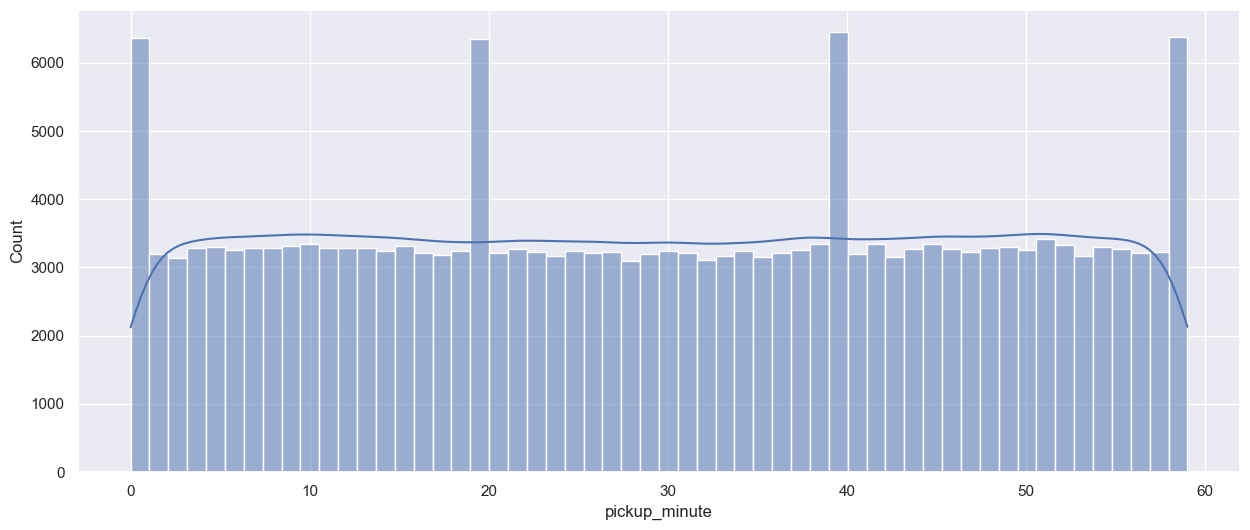

In [45]:
for i in num_col:    
    sns.set()
    plt.figure(figsize = (15, 6))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

# Split the data

In [122]:
x = df.drop(columns = ['fare_amount'])
y = df[['fare_amount']]

In [123]:
x.head()

,passenger_count,Distance (km),pickup_month,pickup_day,pickup_hour,pickup_minute
0,1,1.683323,5,7,19,52
1,1,2.457590,7,17,20,4
2,1,5.036377,8,24,21,45
3,3,1.661683,6,26,8,22
4,5,4.475450,8,28,17,47


In [124]:
y.head()

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0


In [125]:
print(f"x has : {x.shape}")
print(f"y has : {y.shape}")

x has : (194353, 6)
y has : (194353, 1)


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, shuffle = True, train_size = 0.7)

In [127]:
print(f"x_train has : {x_train.shape}")
print(f"y_train has : {y_train.shape}")
print(f"x_test has : {x_test.shape}")
print(f"y_test has : {y_test.shape}")

x_train has : (136047, 6)
y_train has : (136047, 1)
x_test has : (58306, 6)
y_test has : (58306, 1)


# Correlation of the data.

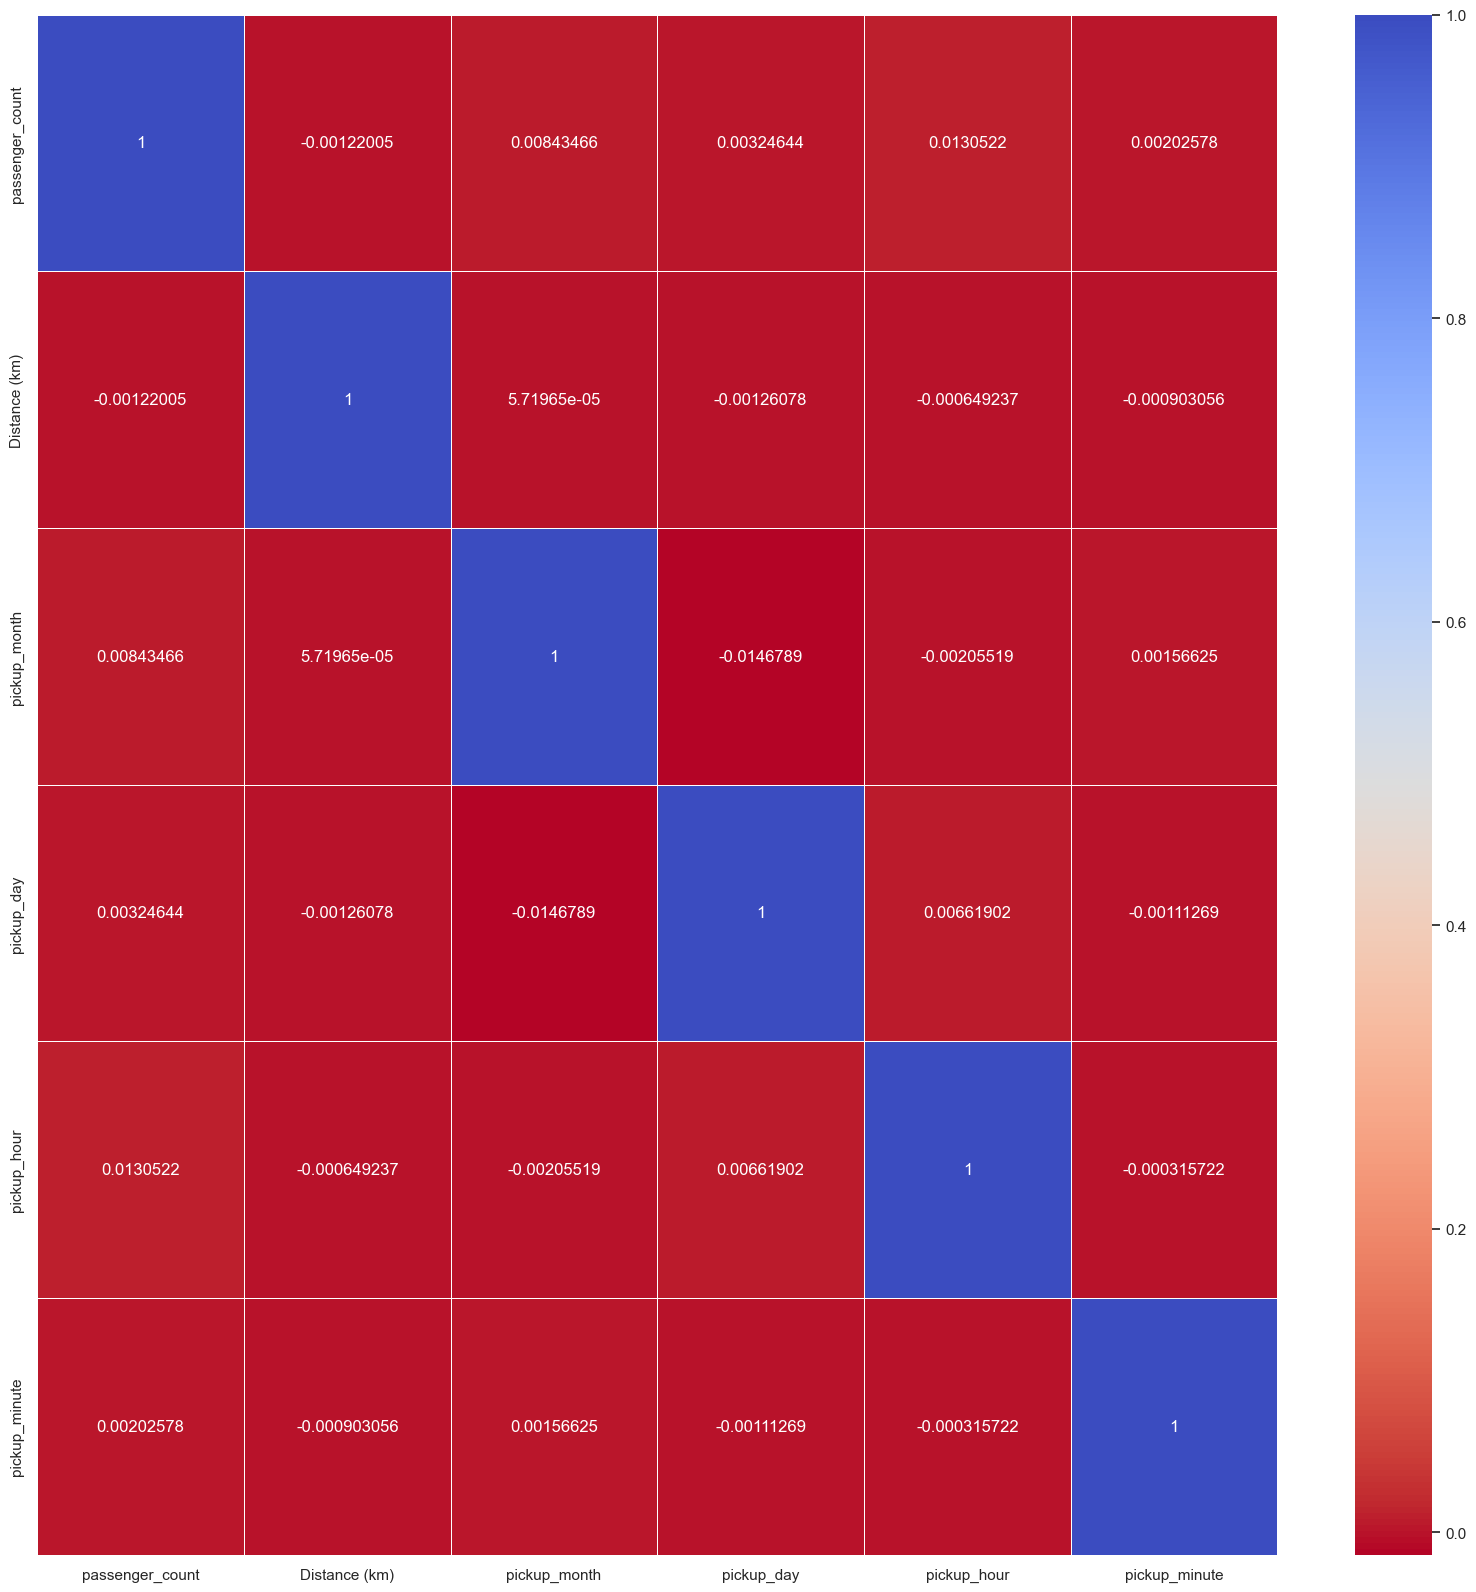

In [128]:
sns.set()
plt.figure(figsize = (20, 20))
sns.heatmap(x_train.corr(), annot = True, linewidths = 0.6, cmap = "coolwarm_r", fmt = 'g')
plt.show()

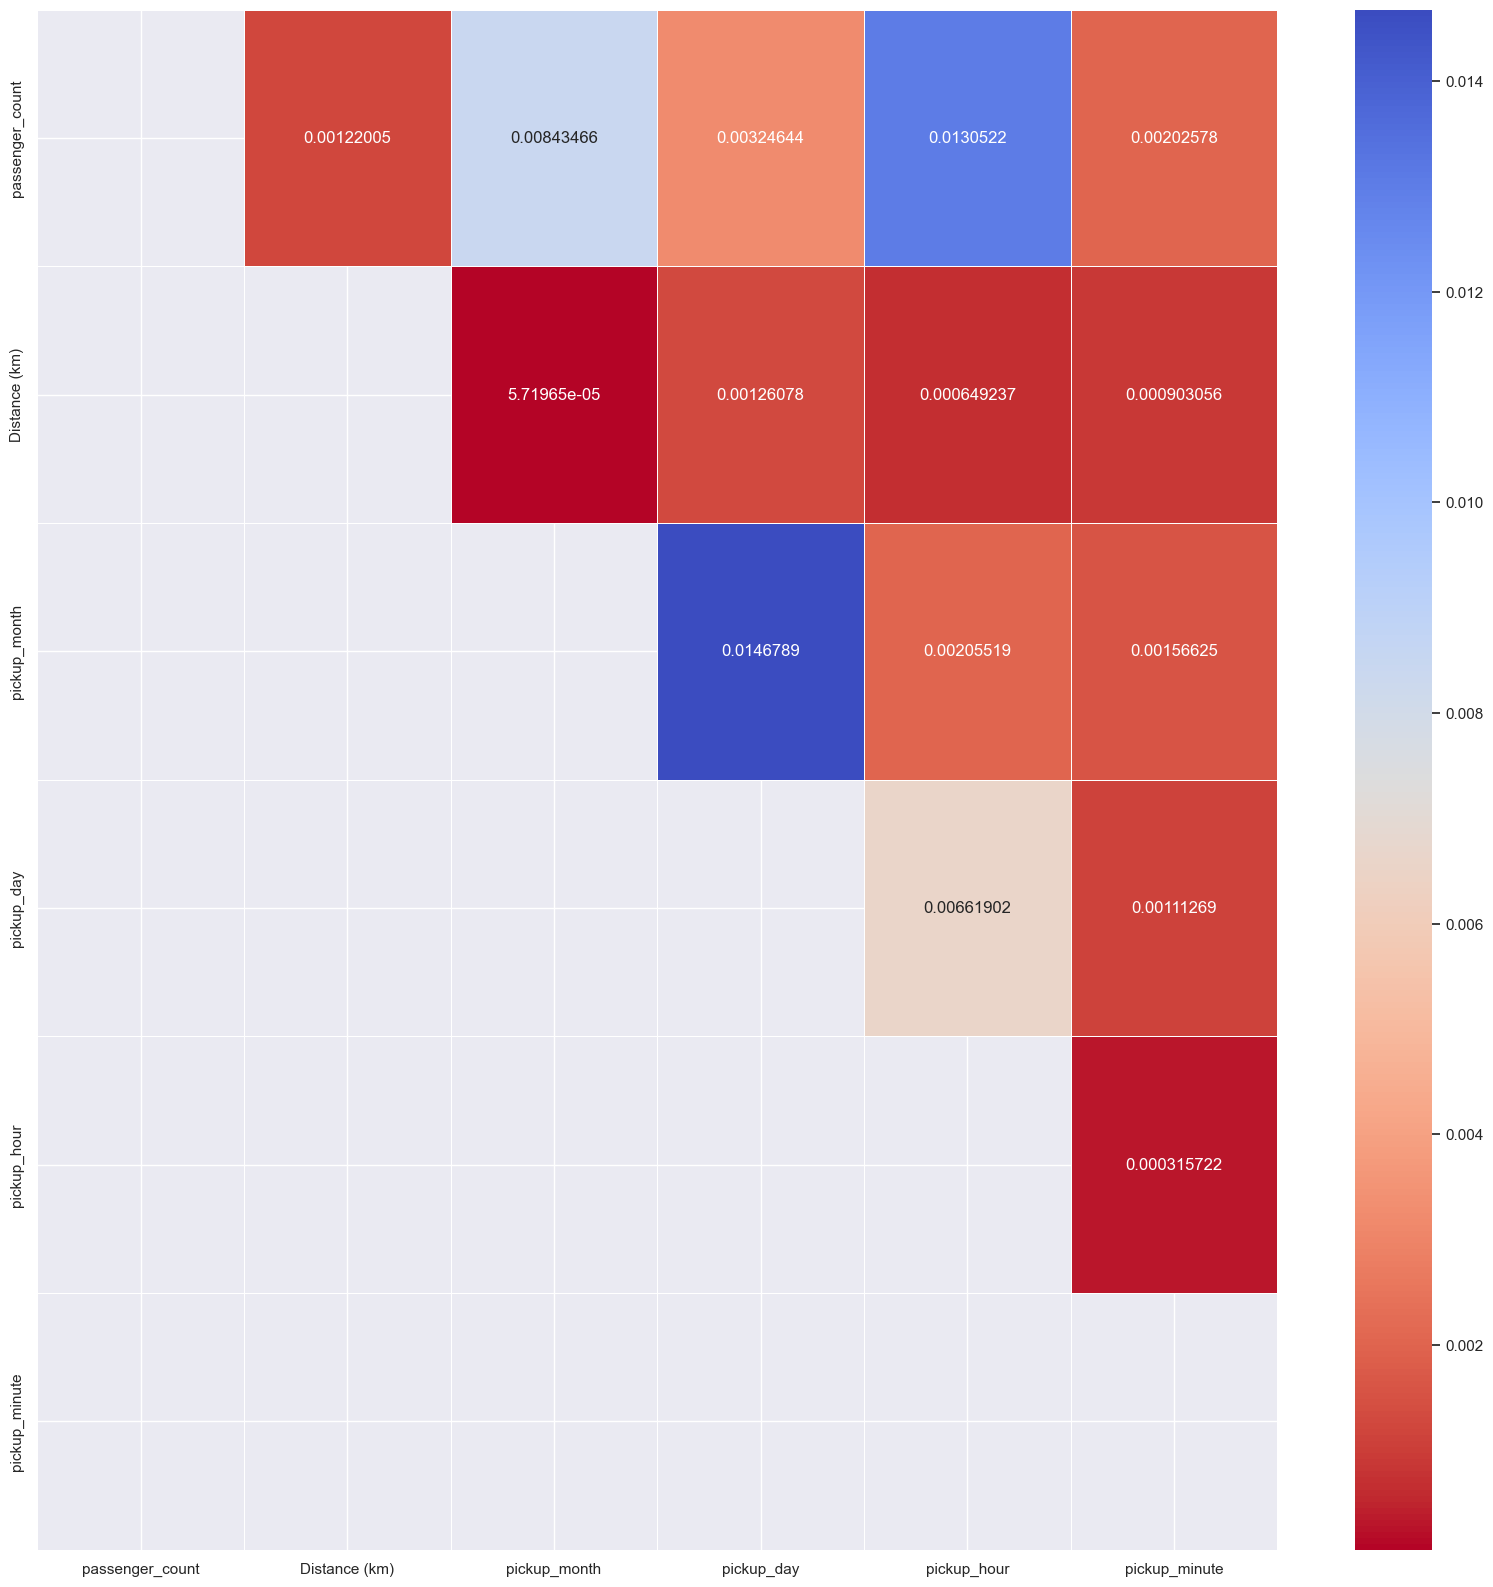

In [129]:
corr = x_train.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

sns.set()
plt.figure(figsize = (20, 20))
sns.heatmap(upper, annot = True, linewidths = 0.6, cmap = "coolwarm_r", fmt = 'g')
plt.show()

In [130]:
to_drop = list(column for column in upper.columns if any(upper[column] > 0.95))

to_drop

[]

# Scaling the dataset.

In [131]:
scaling_pipe = Pipeline(steps =[
    ('Standard scaler', StandardScaler())
])

scaling_pipe

Pipeline(steps=[('Standard scaler', StandardScaler())])

# Model Building

In [134]:
def model_building(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    y_train_df = pd.DataFrame({"y train " : y_train, "y train prediction" : y_train_pred})
    y_test_df = pd.DataFrame({"y test " : y_test, "y test prediction" : y_test_pred})